In [1]:
# Don't display filter warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import xarray as xr
import os
import datetime

### Load all files at once

In [2]:
ls '/Users/jet/CN-Reanalysis20181231/'

CN-Reanalysis2018123100.nc  CN-Reanalysis2018123112.nc
CN-Reanalysis2018123101.nc  CN-Reanalysis2018123113.nc
CN-Reanalysis2018123102.nc  CN-Reanalysis2018123114.nc
CN-Reanalysis2018123103.nc  CN-Reanalysis2018123115.nc
CN-Reanalysis2018123104.nc  CN-Reanalysis2018123116.nc
CN-Reanalysis2018123105.nc  CN-Reanalysis2018123117.nc
CN-Reanalysis2018123106.nc  CN-Reanalysis2018123118.nc
CN-Reanalysis2018123107.nc  CN-Reanalysis2018123119.nc
CN-Reanalysis2018123108.nc  CN-Reanalysis2018123120.nc
CN-Reanalysis2018123109.nc  CN-Reanalysis2018123121.nc
CN-Reanalysis2018123110.nc  CN-Reanalysis2018123122.nc
CN-Reanalysis2018123111.nc  CN-Reanalysis2018123123.nc


In [3]:
def preprocess(_ds):
    name = os.path.basename(_ds.encoding['source'])
    _ds['time'] = datetime.datetime(int(name[13:17]),int(name[17:19]),int(name[19:21]),int(name[21:23]))
    return _ds

In [4]:
# Load all files into single dataset
ds = xr.open_mfdataset('/Users/jet/CN-Reanalysis20181231/CN*.nc',concat_dim='bottom-top', preprocess=preprocess)

### Postprocessing: Assign coordinates `x`, `y` and `time`

In [5]:
ds = ds.assign_coords({'west-east': ds['west-east'], 
                       'south-north': ds['south-north'],
                       'bottom-top': ds['bottom-top']})
ds = ds.swap_dims({'bottom-top':'time'}).rename({'west-east':'x','south-north':'y'}).reset_coords(drop=True)

In [6]:
# Include latitude and longitude in coordinates (as 2d fields)
ds = ds.assign_coords({'lon2d': ds['lon2d'][0].reset_coords(drop=True),
                       'lat2d': ds['lat2d'][0].reset_coords(drop=True)})

In [7]:
ds

<xarray.Dataset>
Dimensions:  (time: 24, x: 432, y: 339)
Coordinates:
    lat2d    (y, x) float32 dask.array<chunksize=(339, 432), meta=np.ndarray>
    lon2d    (y, x) float32 dask.array<chunksize=(339, 432), meta=np.ndarray>
  * time     (time) datetime64[ns] 2018-12-31 ... 2018-12-31T23:00:00
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 423 424 425 426 427 428 429 430 431
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 330 331 332 333 334 335 336 337 338
Data variables:
    u        (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>
    v        (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>
    temp     (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>
    rh       (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>
    psfc     (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>
    pm25     (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>
    pm10     (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>
    so2      (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>
    no2      (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>
    co       (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>
    o3       (time, y, x) float32 dask.array<chunksize=(1, 339, 432), meta=np.ndarray>

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ds.temp.isel(time=0)

<xarray.DataArray 'temp' (y: 339, x: 432)>
dask.array<getitem, shape=(339, 432), dtype=float32, chunksize=(339, 432), chunktype=numpy.ndarray>
Coordinates:
    lat2d    (y, x) float32 dask.array<chunksize=(339, 432), meta=np.ndarray>
    lon2d    (y, x) float32 dask.array<chunksize=(339, 432), meta=np.ndarray>
    time     datetime64[ns] 2018-12-31
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 423 424 425 426 427 428 429 430 431
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 330 331 332 333 334 335 336 337 338
Attributes:
    unit:     K

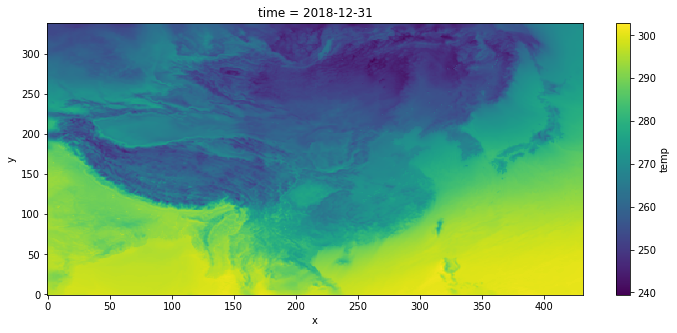

In [10]:
ds.temp.isel(time=0).plot(figsize=(12,5))

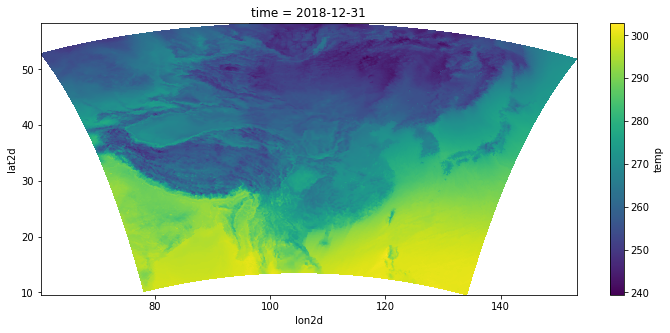

In [11]:
ds.temp.isel(time=0).plot(x='lon2d',y='lat2d',figsize=(12,5))

In [27]:
# Example to pick location and convert to dataframe (table)
ds.sel({'x':200,'y':150},method='nearest').reset_coords(drop=True).to_dataframe()

,u,v,temp,rh,psfc,pm25,pm10,so2,no2,co,o3
time,,,,,,,,,,,
2018-12-31 00:00:00,10.693928,-2.306368,265.410461,30.102943,66838.734375,0.380872,0.441677,0.122780,0.792199,0.133308,73.109222
2018-12-31 01:00:00,11.639087,-1.361199,265.309296,30.849335,66807.593750,0.377267,0.439333,0.119015,0.809482,0.132083,71.971100
2018-12-31 02:00:00,11.774736,-0.208985,265.174316,33.679161,66812.906250,0.389457,0.451126,0.118456,0.849672,0.131008,70.616432
2018-12-31 03:00:00,11.581177,0.747636,265.040649,36.072620,66833.085938,0.405437,0.563505,0.118113,0.885521,0.130244,69.340591
2018-12-31 04:00:00,11.037891,1.334007,264.897614,37.761364,66863.796875,0.427010,0.602334,0.120581,0.941130,0.129478,67.780594
2018-12-31 05:00:00,10.537957,2.009463,264.778442,39.160904,66882.656250,0.440770,0.514723,0.124339,0.986957,0.128210,66.236748
2018-12-31 06:00:00,10.446728,2.111958,264.742462,40.142082,66905.375000,0.456882,0.536736,0.127236,1.018679,0.126908,65.166580
2018-12-31 07:00:00,10.716715,1.791097,264.809998,40.221523,66942.140625,0.471858,0.550753,0.128219,1.030530,0.126201,64.860741
2018-12-31 08:00:00,10.731793,1.984445,264.891876,39.961708,66841.906250,0.483164,0.698007,0.129230,1.066696,0.125906,64.472565
